In [1]:
!pip install pandas

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression #로지스틱회귀모델 
from sklearn.tree import DecisionTreeClassifier #의사결정나무

In [3]:
#1 주소 복사하고 \를 /로 바꿔줘야함
#2 불러올 파일명을 정확하게 입력할 것

train = pd.read_csv('C:/Users/ahwon/Downloads/Titanic/train.csv') 
test = pd.read_csv('C:/Users/ahwon/Downloads/Titanic/test.csv') 
submisson = pd.read_csv('C:/Users/ahwon/Downloads/Titanic/submission.csv') 

In [35]:
### EDA는 탐색적 조사로 데이터의 전반적인 특성과 어떤 변수를 어떻게 활용할 것인지에 대해 확인하는 단계

type(train)
train.head(20) # head() 함수는 train자료에서 상위 5개의 행만 뽑아서 나타내줌

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",NaN,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",NaN,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",NaN,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",NaN,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",NaN,14.0,1,0,237736,30.0708,NaN,C


In [36]:
test.head(20) #test파일도 확인해보기

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
submisson.head() #submisson파일은 데이콘에 제출하는 답안지 개념임

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
print(train.shape) #shape을 사용하면 데이터프레임의 행과 열의 개수를 확인할 수 있음
print(test.shape)
print(submisson.shape) 

(891, 12)
(418, 11)
(418, 2)


In [8]:
# info() 함수는 데이터셋의 column type, non-null 여부 등 column별 정보를 알려줌

train.info() # 결측값을 없애주기 위해 우선 결측값을 찾아야함

# age, cabin, embarked의 개수가 비는 것을 확인 (나머지는 다 891)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe() # 숫자형 (정수, 실수형) column들의 기술 통계량을 보여주는 함수

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# pd.Series.value_counts() 함수는 series(하나의 열)에만 적용됨
# series 내 고유값들의 개수를 보여주는 함수 (null값은 고려하지 않으며, 개수를 내림차순으로 정리)

train['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# pd.Series.unique()는 해당 series의 고유값들만 보여주는 함수
# null값도 포함하며, 입력된 순서대로 나옴(특별한 정렬 없음)

train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
train.groupby('Sex').mean() # pd.DataFrame.groupby() 함수는 집단에 대한 통계량 확인하는 함수

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [13]:
train.groupby('Pclass').mean() # 객실의 등급에 따른 평균적인 정보

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [14]:
train.groupby('Pclass').mean()['Survived'] # 객실의 등급에 따른 생존율에 대한 정보

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

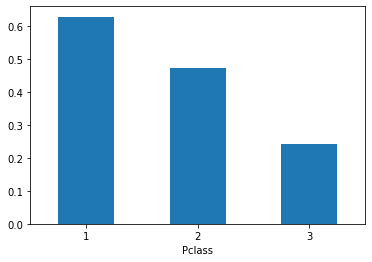

In [15]:
train.groupby('Pclass').mean()['Survived'].plot(kind = 'bar', rot = 0) # 객실의 등급에 따른 생존율에 대한 정보를 막대그래프로 나타내기

<AxesSubplot:ylabel='Frequency'>

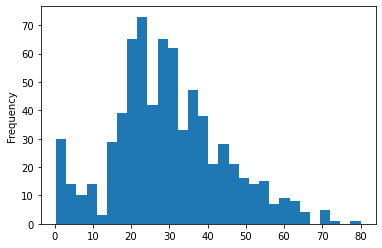

In [16]:
train['Age'].plot(kind="hist", bins = 30) # 나이를 총 30개의 구간으로 나눈 뒤, 이를 히스토그램으로 나타내기

<AxesSubplot:ylabel='Frequency'>

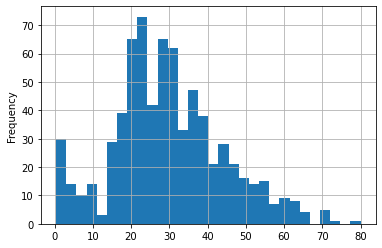

In [17]:
train['Age'].plot(kind="hist", bins = 30, grid = True) # 기존 히스토그램에 격자 추가하기

<AxesSubplot:xlabel='Age', ylabel='Fare'>

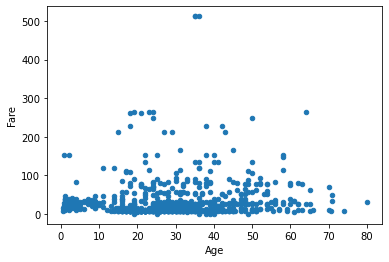

In [18]:
# pd.DataFrame.plot(x,y, kind = 'scatter')는 산점도를 나타냄 

train.plot(x = 'Age', y = 'Fare', kind = 'scatter') # 산점도를 활용하여 나이와 요금과의 관계를 나타냄

In [19]:
### 데이터 전처리는 탐색적 조사를 통해 확인해 본 데이터들 중  깔끔하게 정리하는 것

train.isna().sum() # pd.Series.isna()는 결측치 여부를 확인하여 결측치면 True, 아니면 False을 출력함

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train['Age'] = train['Age'].fillna(28) # 나이에 대한 결측값은 전체 나이의 중앙값인 28로 채워줌

In [21]:
train['Embarked'] = train['Embarked'].fillna('S') # 승선한 항에 대한 결측값은 최빈값인 'S'로 채워줌

# 객실번호(Carbin)에 대한 결측값에 대해서도 생각을 해봤는데, 누락된 687개의 객실번호를 임의의 한 가지 번호로 채운다는 게 무의미하다고 생각함

In [22]:
train.isna().sum() #train.isna()를 다시 적용해보면 carbin을 제외한 두가지 결측값이 모두 메워진 걸 확인 가능

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
train['Sex'] = train['Sex'].map({'male' :0, 'female' :1}) # pd.Series.map()는 열 내의 값을 변환 할 때 사용하는 함수

In [24]:
train.head() # 성별이 'male', 'female'에서 0과 1로 치환된 것을 확인 가능

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [25]:
### 모델링은 컴퓨터에 특정 모델을 학습시켜 지금까지 예쁘게 정리한 데이터를 이용하여 '타이타닉호의 생존률'을 예측하기 위한 과정
#1 의사결정나무란 특정 질문에 대한 대답을 Y or N로 구분하고 이를 연속적으로 반복하여 의사결정을 하는 방법
#1-1 의사결정나무 모델에서는 질문 다시말해 데이터를 둘로 나누는 기준을 무엇으로 삼느냐가 핵심이다. 본 프로젝트에서 성별의 경우, 모든 탑승객이 남성 혹은 여성 단 두가지로만 구분되기 때문에 데이터를 나누는 데에 최적인 질문이라고 볼 수 있다. 
#1-2 즉 "데이터를 둘로 나누는 최적의 조건을 찾기 위해 가장 큰 변수 순서대로 의사결정나무를 따라가는 것이 효율적이다" [출처] 데이터로 좋은 결정 내리는 방법, 의사결정 나무|작성자 과학기술정보통신부
#2 로지스틱회귀모델,, 아직까진 이해가 부족합니다

In [26]:
X_train = train[['Sex', 'Pclass']]
y_train = train['Survived']

In [27]:
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})

In [28]:
train[['Sex', 'Pclass']] #위에서 성별을 0과 1로 변경하는 과정을 거쳤는데 성별에 NaN가 뜨는 이유를 모르겠어요 ,,

,Sex,Pclass
0,NaN,3
1,NaN,1
2,NaN,3
3,NaN,1
4,NaN,3
...,...,...
886,NaN,2
887,NaN,1
888,NaN,3
889,NaN,1


In [29]:
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})

In [30]:
test[['Sex', 'Pclass']]

,Sex,Pclass
0,0,3
1,1,3
2,0,2
3,0,3
4,1,3
...,...,...
413,0,3
414,1,1
415,0,3
416,0,3


In [31]:
X_train = train[['Sex', 'Pclass']]

In [32]:
X_test = test[['Sex', 'Pclass']]

In [33]:
lr = LogisticRegression()

In [34]:
dt = DecisionTreeClassifier()